<a href="https://colab.research.google.com/github/isarocl/dataset_titanic/blob/master/dataset_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic: Machine Learning from Disaster**
[Desafio Kaggle](https://www.kaggle.com/c/titanic)



---

# **Business Understanding**


**Entender e delimitar o problema**


O naufrágio do Titanic é um dos mais infames naufrágios da história. Em 15 de abril de 1912, durante sua viagem inaugural, o amplamente considerado "inafundável" RMS Titanic afundou após colidir com um iceberg. Infelizmente, não havia barcos salva-vidas suficientes para todos a bordo, resultando na morte de 1502 dos 2224 passageiros e tripulantes. Embora houvesse algum elemento de sorte envolvido na sobrevivência, parece que alguns grupos de pessoas eram mais propensos a sobreviver do que outros. 

**Obejtivo do Projeto**

Construir um modelo preditivo que responda à pergunta: "Que tipo de pessoas tinham mais probabilidade de sobreviver?". Usando dados de passageiros (nome, idade, sexo, classe socioeconômica etc.).

# **Data Understanding**

**Carregar bibliotecas**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns 
import os as os

**Carregar dataset**

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

**Entender os atributos**

* **PassengerId:** Número de identificação do passageiro;
* **Survived:** Indica se o passageiro sobreviveu ao desastre. É atribuído o valor de 0 para aqueles que não sobreviveram, e 1 para quem sobreviveu;
* **Pclass:** Classe na qual o passageiro viajou. É informado 1 para primeira classe; 2 para segunda; e 3 para terceira;
* **Name:** Nome do passageiro;
* **Sex:** Sexo do passageiro;
* **Age:** Idade do passageiro em anos;
* **SibSp:** Quantidade de irmãos e cônjuges a bordo ;
* **Parch:** Quantidade de pais e filhos a bordo;
* **Ticket:** Número da passagem;
* **Fare:** Preço da passagem;
* **Cabin:** Número da cabine do passageiro;
* **Embarked:** Indica o porto no qual o passageiro embarcou. Há apenas três valores possíveis: Cherbourg, Queenstown e Southampton, indicados pelas letras “C”, “Q” e “S”, respectivamente



**Verificar tipos dos atributos**

In [3]:
print("Variáveis:\t{}\nEntradas:\t{}".format(train.shape[1], train.shape[0]))

Variáveis:	12
Entradas:	891


In [4]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

**Observar amostra dos dados**

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Descrever estatisticamente os dados**

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Visualizar distribuição dos dados**

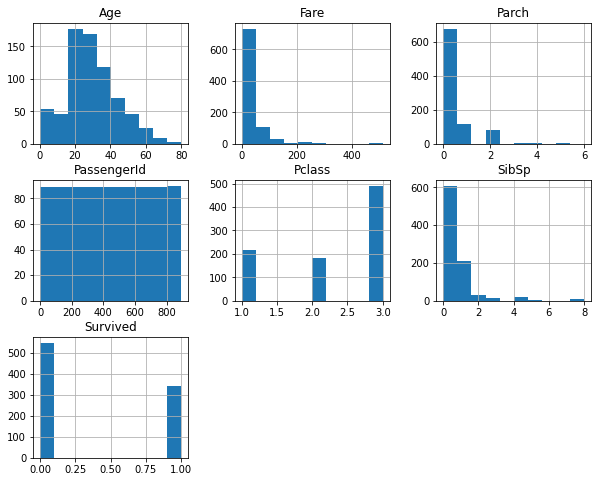

In [7]:
train.hist(figsize=(10,8));

**Analisar a probabilidade de sobrevivência pelo Sexo**

In [8]:
train[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


**Plotar os gráficos para Survived vs. Sex, Pclass e Embarked**

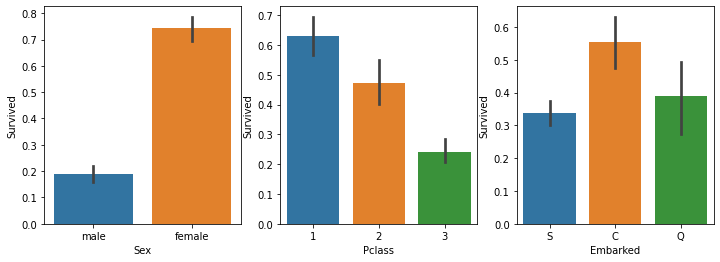

In [9]:
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(12,4))

sns.barplot(x='Sex', y='Survived', data=train, ax=axis1)
sns.barplot(x='Pclass', y='Survived', data=train, ax=axis2)
sns.barplot(x='Embarked', y='Survived', data=train, ax=axis3);

# **Data Preparation**

**Juntar os conjuntos de dados de treino e teste**

---
Salvar os índices dos datasets para recuperação posterior


In [10]:
train_idx = train.shape[0]
test_idx = test.shape[0]

Salvar PassengerId para submissao ao Kaggle

In [11]:
passengerId = test['PassengerId']

Extrair coluna 'Survived' e excluir ela do dataset treino

In [12]:
target = train.Survived.copy()
train.drop(['Survived'], axis=1, inplace=True)

Concatenar treino e teste em um único DataFrame

In [13]:
df_merged = pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

print("df_merged.shape: ({} x {})".format(df_merged.shape[0], df_merged.shape[1]))

df_merged.shape: (1309 x 11)


**Retirar dados irrelevantes**

In [14]:
df_merged.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare'], axis=1, inplace=True)

display(df_merged.head())

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,22.0,1,0,S
1,1,female,38.0,1,0,C
2,3,female,26.0,0,0,S
3,1,female,35.0,1,0,S
4,3,male,35.0,0,0,S


**Verificar presença de valores nulos**

In [15]:
df_merged.isnull().sum()

Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Embarked      2
dtype: int64

**Tratar valores nulos**

São tratamentos comuns para valores nulos:

* Exclusão do atributo (caso ele seja nulo para grande parte das instâncias);
* Exclusão da instância (caso ela seja nula para grande parte dos atributos);
* Imputação por estatísticas simples, como média, mediana ou moda (podem ser calculadas para sub-amostras);
* Imputação por regressão e modelos preditivos.

---
Age: calcular o valor da mediana


In [16]:
age_median = df_merged['Age'].median()
df_merged['Age'].fillna(age_median, inplace=True)

Embarked: adicionar o valor com maior frequência

In [17]:
embarked_top = df_merged['Embarked'].value_counts()[0]
df_merged['Embarked'].fillna(embarked_top, inplace=True)

**Preparar as variáveis para o modelo de Machine Learnig**

Converter 'Sex' em 0 e 1

In [18]:
df_merged['Sex'] = df_merged['Sex'].map({'male': 0, 'female': 1})

Dummie variables para 'Embaked'

In [19]:
embarked_dummies = pd.get_dummies(df_merged['Embarked'], prefix='Embarked')
df_merged = pd.concat([df_merged, embarked_dummies], axis=1)
df_merged.drop('Embarked', axis=1, inplace=True)

display(df_merged.head())

,Pclass,Sex,Age,SibSp,Parch,Embarked_914,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,0,0,0,1
1,1,1,38.0,1,0,0,1,0,0
2,3,1,26.0,0,0,0,0,0,1
3,1,1,35.0,1,0,0,0,0,1
4,3,0,35.0,0,0,0,0,0,1


**Recuperar os conjunto de dados de treino e teste**

In [20]:
train = df_merged.iloc[:train_idx]
test = df_merged.iloc[train_idx:]

# **Modeling e Evaluating**

Criar um modelo de Machine Learning de Regressão Logística

In [21]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(train, target)

# verificar a acurácia do modelo
acc_logReg = round(lr_model.score(train, target) * 100, 2)
print("Acurácia do modelo de Regressão Logística: {}".format(acc_logReg))

Acurácia do modelo de Regressão Logística: 80.02


Criar um modelo de Machine Learning de Árvore de Decisão

In [22]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(train, target)

# verificar a acurácia do modelo
acc_tree = round(tree_model.score(train, target) * 100, 2)
print("Acurácia do modelo de Árvore de Decisão: {}".format(acc_tree))

Acurácia do modelo de Árvore de Decisão: 82.83


**Submetendo os resultados ao Kaggle**

In [25]:
# Regressão Lógística
y_pred_lr = lr_model.predict(test)

submission = pd.DataFrame({"PassengerId": passengerId, "Survived": y_pred_lr})

submission.to_csv('./submission_lr.csv', index=False)

#Árvore de Decisão
y_pred_tree = tree_model.predict(test)

submission = pd.DataFrame({"PassengerId": passengerId, "Survived": y_pred_tree})

submission.to_csv('./submission_tree.csv', index=False)

# **Eu sobreviveria ao Titanic?**

Árvore de Decisão

In [23]:
isabelle_lima = np.array([1, 1, 24, 0, 1, 0, 0, 1, 0]).reshape((1, -1))

print("Isabelle Lima:\t{}".format(tree_model.predict(isabelle_lima)[0]))


Isabelle Lima:	1


Regressão Logística

In [24]:
isabelle_lima = np.array([2, 1, 24, 0, 1, 0, 0, 1, 0]).reshape((1, -1))

print("Isabelle Lima:\t{}".format(lr_model.predict(isabelle_lima)[0]))

Isabelle Lima:	1
